In [6]:
# Import of nessery library

import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
from mysql.connector import (connection)
import seaborn as sns


# Number of total hours by year

In [7]:

mydb = mysql.connector.connect(user='root', password='koreniz2',
                                     host='127.0.0.1',
                                     database='apocrifi_projec')

# function that returns sum(hours) of projects in year

def hours_by_year(year):
    
    cursor = mydb.cursor()
    
    sql_select_query = """select sum(hours) from hours where year(work_date)=%s """
    q=(year)
    cursor.execute(sql_select_query,(q,))
    record = cursor.fetchone()[0]
    
    return record

In [8]:
def plot_hours_by_year(year):
    
    years=year
    hours_year=dict()
    for p in years:
        hours_year[p]=int(hours_by_year(p))
    df=pd.DataFrame({'Year':hours_year.keys(),'Hours':hours_year.values()})
    plt.figure(figsize=(20,10))
    ax = sns.barplot(x = "Year", y = "Hours", data = df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
    ax.set(ylabel = "Hours")

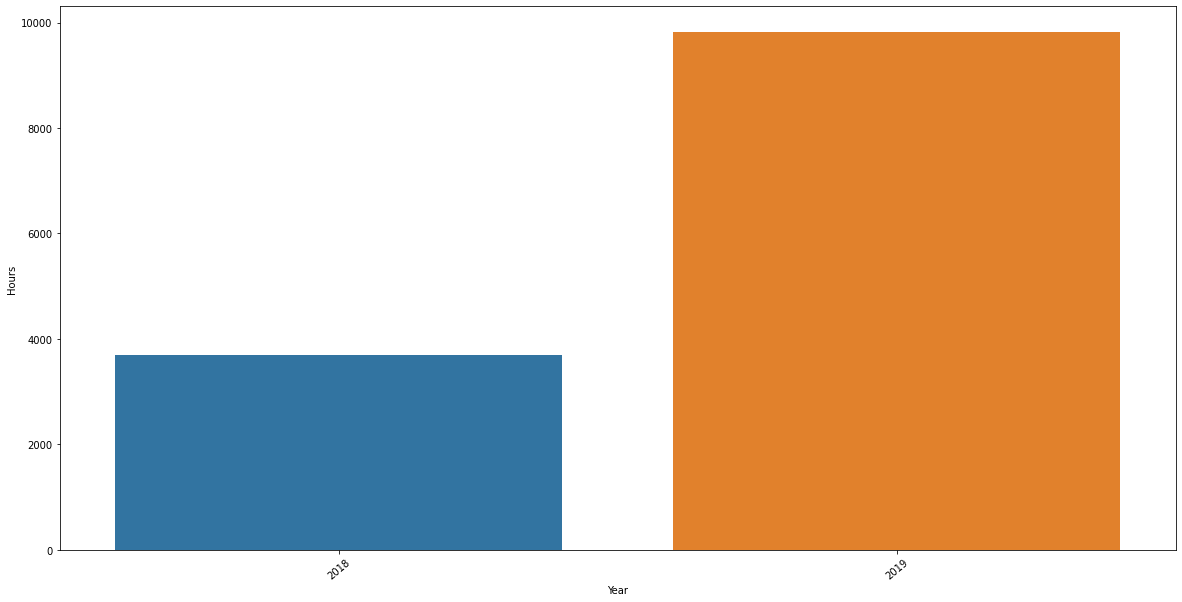

In [9]:
plot_hours_by_year(['2018','2019'])

# Number of hours by month

In [19]:
mydb = mysql.connector.connect(user='root', password='koreniz2',
                                     host='127.0.0.1',
                                     database='apocrifi_projec')

# function that returns sum(hours) of projects in year

def hours_by_month(month,year):
    
    cursor = mydb.cursor()
    
    sql_select_query = """select sum(hours) from hours where year(work_date)=%s and month(work_date)=%s"""
    q=(year,month)
    cursor.execute(sql_select_query,q)
    record = cursor.fetchone()[0]
    
    return record

In [22]:
def plot_hours_by_month(year):
    
    month=[i for i in range (1,13)]
    hours_month=dict()
    for p in month:
        hours_month[p]=int(hours_by_month(p,year))
    df=pd.DataFrame({'Month':hours_month.keys(),'Hours':hours_month.values()})
    plt.figure(figsize=(20,10))
    ax = sns.barplot(x = "Month", y = "Hours", data = df,color="#4CAF50")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
    ax.set(ylabel = "Hours")
    

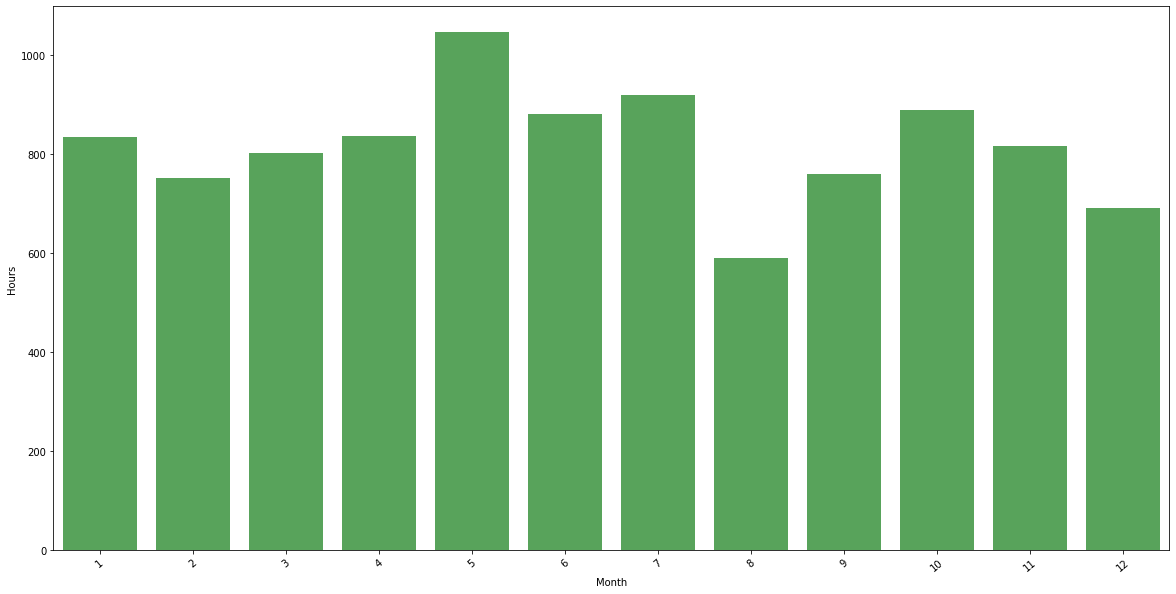

In [23]:
plot_hours_by_month(2019)

# Number of projects by year

In [24]:
def project_number_year(year):
    
    cursor = mydb.cursor()
    print("Project nuber in {} ".format(year))
    sql_select_query = """select count(project_id) from projects where year(entry_date)=%s """
    q=(year)
    cursor.execute(sql_select_query,(q,))
    record = cursor.fetchone()[0]
    print(record)
    
    return record

In [25]:
# function takes list of year we want to consider and plot diagaram of 
# project numbers by year

def plot_project_numb(year):
    years=year
    project_number=dict()
    for p in year:
        project_number[p]=int(project_number_year(p))
    # plot diagram number of project by year

    plt.figure(figsize=(10,8))

    keys = project_number.keys()
    values = project_number.values()
    plt.bar(keys, values,width=0.3)

    plt.title("Number of projcets by year")
    plt.xlabel('Year')
    plt.ylabel('Number of project')



Project nuber in 2018 
47
Project nuber in 2019 
48


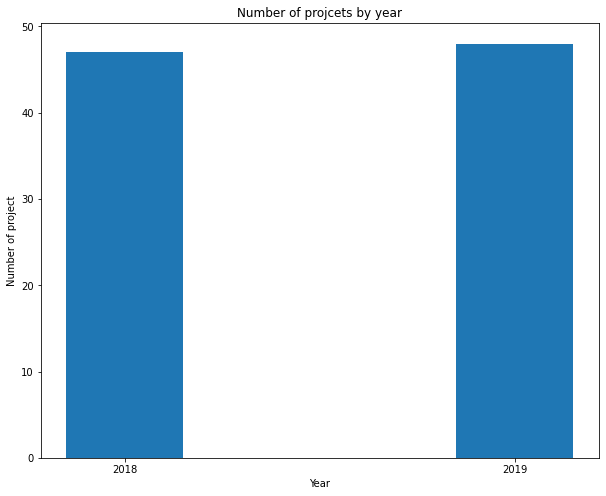

In [16]:
plot_project_numb(['2018','2019'])

# Number of hours by project

In [26]:
# Import of nessery library

import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
from mysql.connector import (connection)

In [27]:
mydb = mysql.connector.connect(user='root', password='koreniz2',
                                     host='127.0.0.1',
                                     database='apocrifi_projec')

# function that returns all projects depends on month and year

def projects_id(month,year):
    
    cursor=mydb.cursor()
    sql_select_query="""select  distinct project_id from hours where month(work_date)=%s  and year
    (work_date)=%s"""
    q=(month,year)
    cursor.execute(sql_select_query,q)
    record=cursor.fetchall()
    
    return record

# function that returns total hours that were spend on project

def project_hours(id):
    
    cursor = mydb.cursor()
    sql_select_query = """select sum(hours) from hours where project_id=%s """
    q=id
    cursor.execute(sql_select_query,(q,))
    record = cursor.fetchone()[0]
    
    return record

# Diagram of total hours by project (mont,year)

In [58]:
def plot_number_projects_by_month_year(month,year):
    
    project_id=projects_id(month,year)
    projects=[ x for x in project_id  for x in x ]
    hours_project=dict()
    for p in projects:
        hours_project[p]=int(project_hours(p))
    df=pd.DataFrame({'Project_id': hours_project.keys(),'Hours': hours_project.values()})
    plt.figure(figsize=(17,7))
    ax = sns.barplot(x = "Project_id", y = "Hours", data = df,color='pink')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
    ax.set(ylabel = "Hours")
    ax.set(title='month:{}, year:{}'.format(month,year))


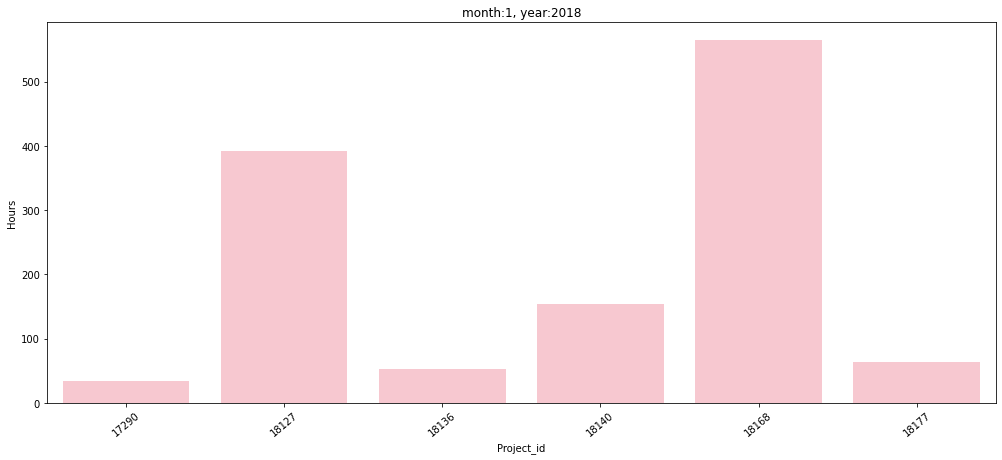

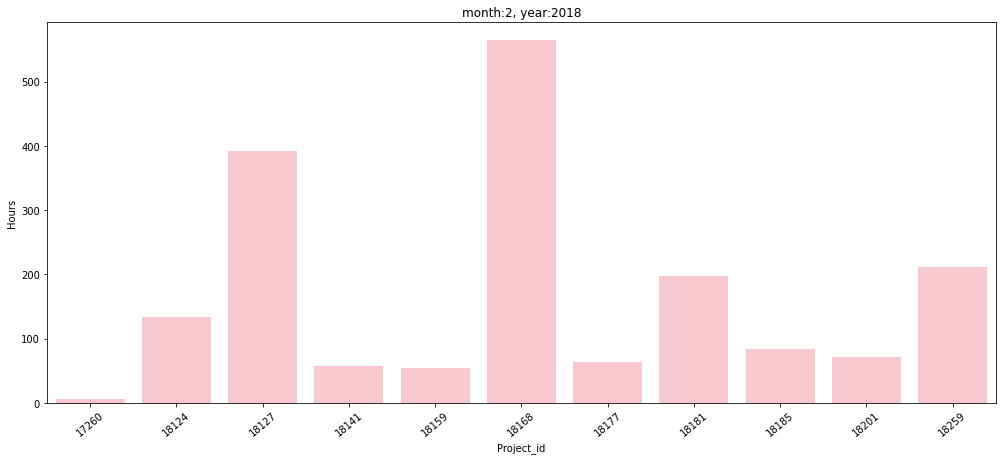

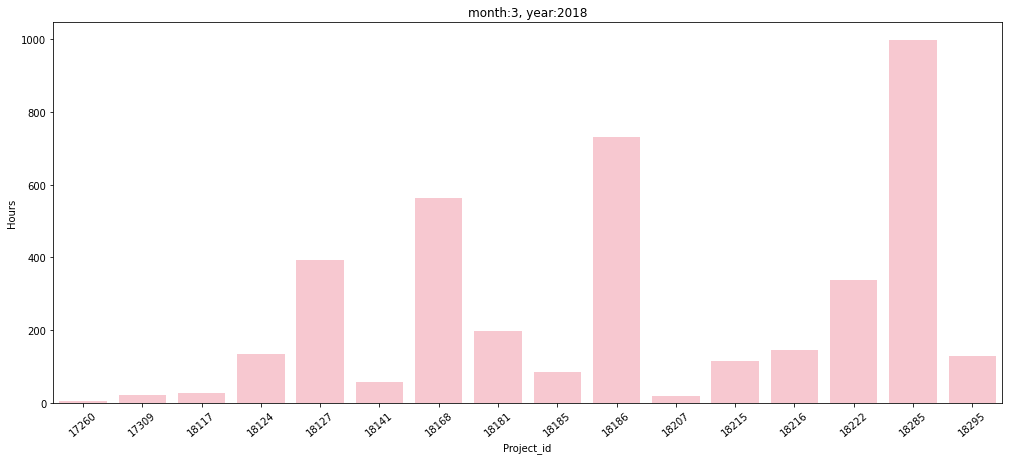

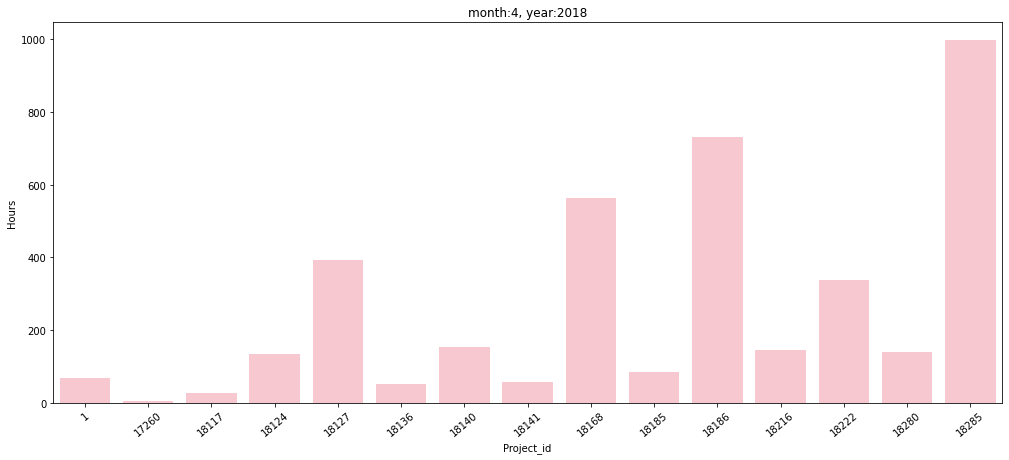

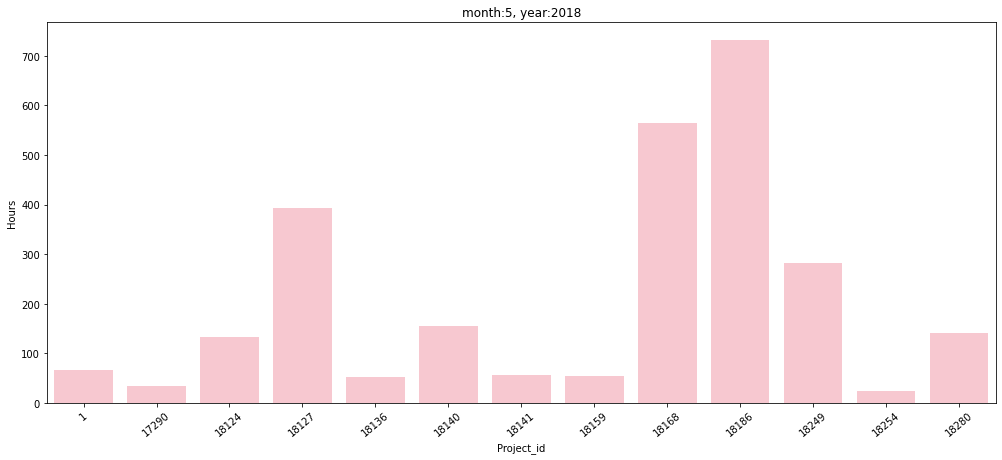

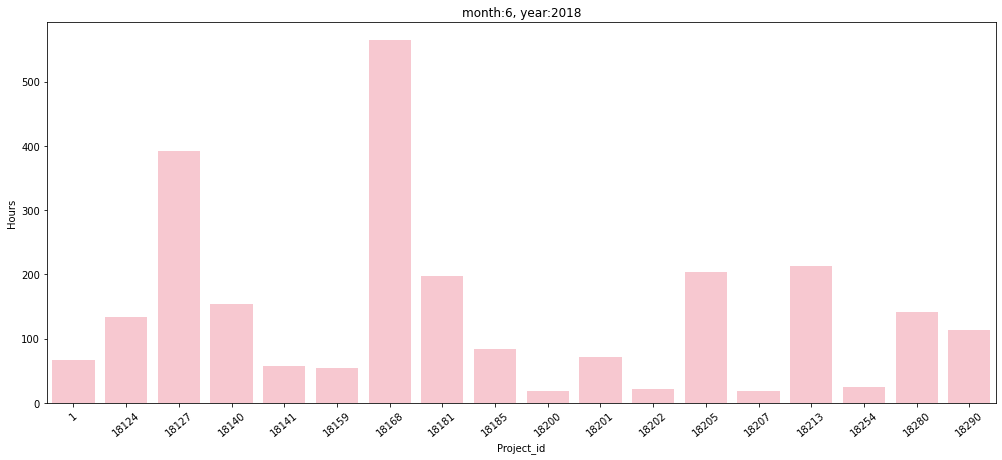

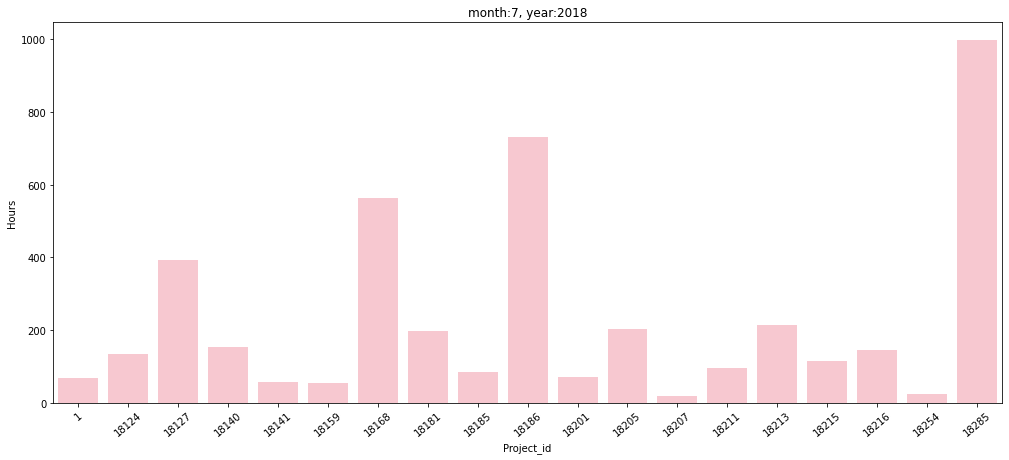

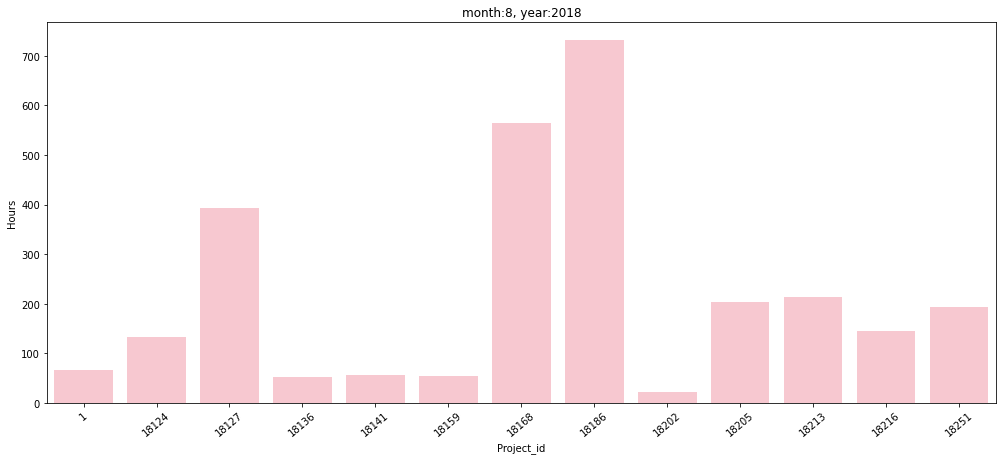

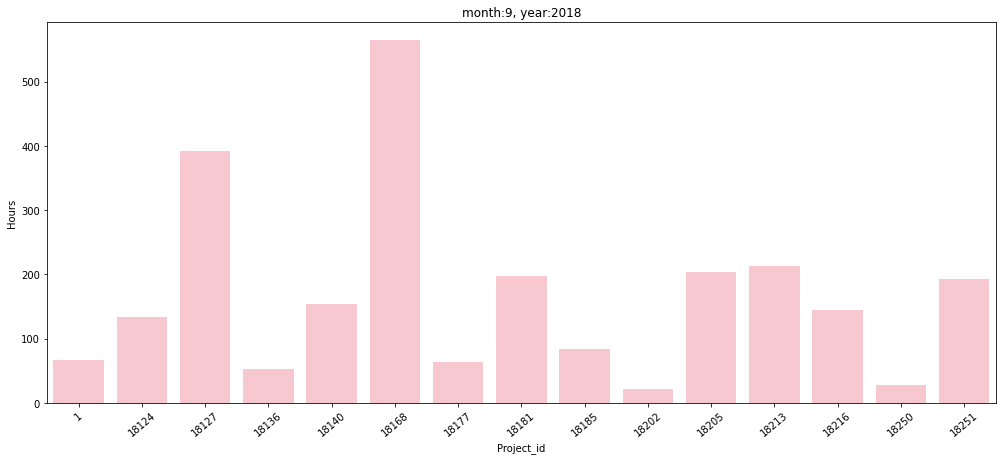

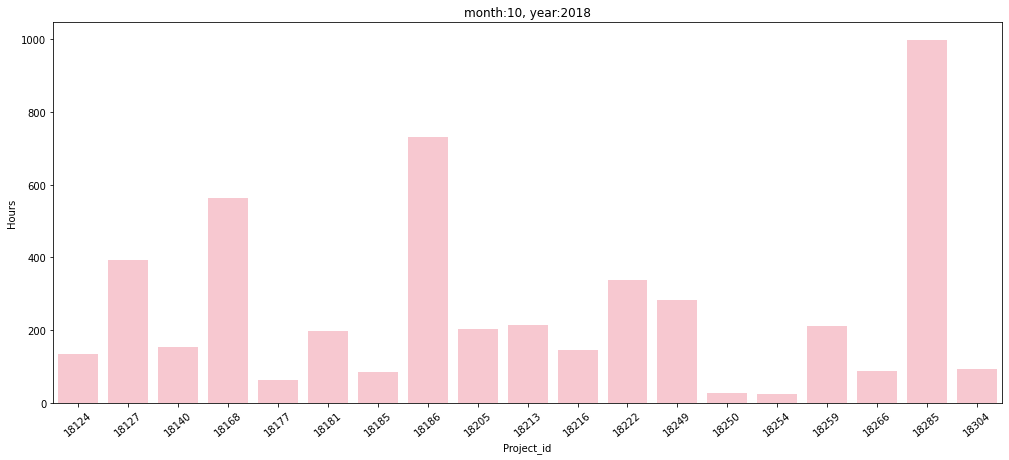

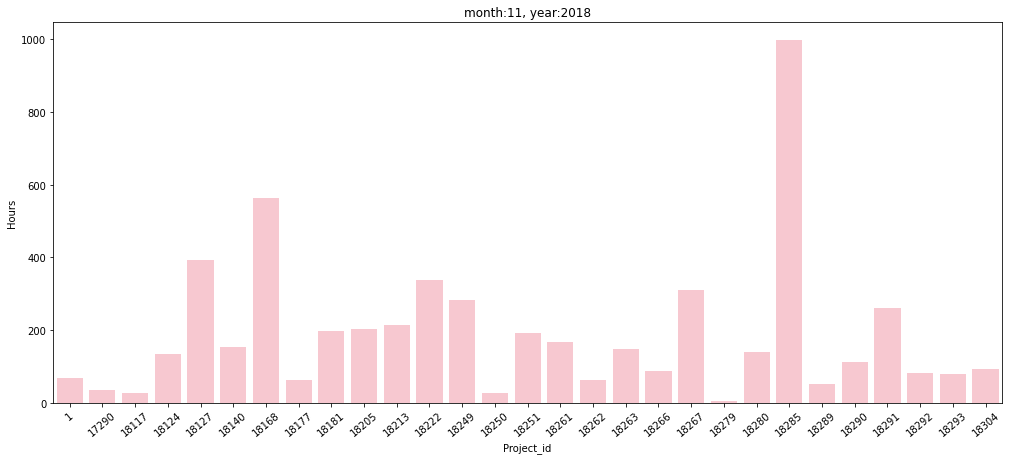

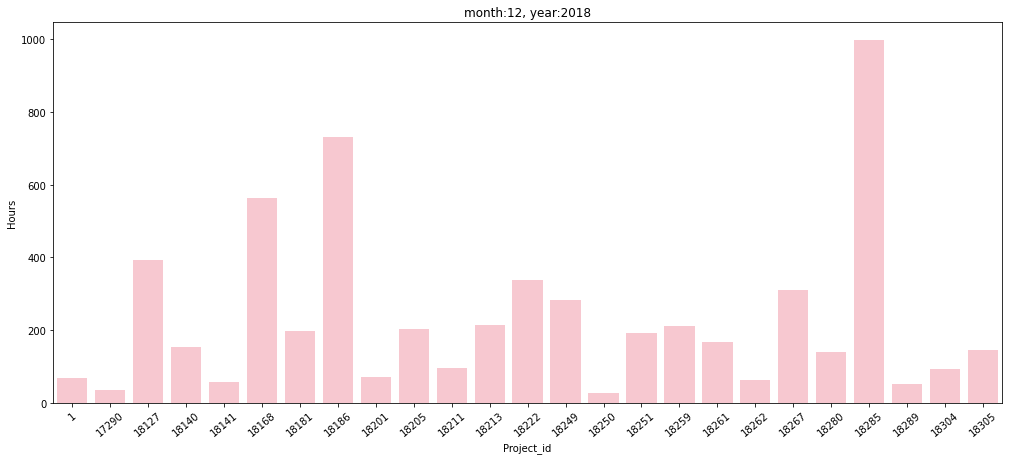

In [59]:
# let's plot diagrams number of projects (form january to december in 2018)

for month in range(1,13):
    plot_number_projects_by_month_year(month,2018)

# Analayze of hours by employee 

In [60]:
# function that returns total hours by month for employee

def employee_hours(employe_id,year,month):
    
    cursor = mydb.cursor()
    
    sql_select_query = """ select sum(hours) from hours 
                            where employee_id=%s 
                            and year(work_date)=%s 
                            and month(work_date)=%s """
    
    q=(employe_id,year,month)
    cursor.execute(sql_select_query,q)
    record = cursor.fetchone()[0]
    if record is None:
        record=0
        
    return record

In [61]:
# functiton that plot total hours by month in wanted year

def employee_hours_month(employee_id,year):
    
    cursor = mydb.cursor()
    sql_select_query = """select first_name,last_name from employee where employee_id=%s"""
    q=(employee_id)
    cursor.execute(sql_select_query,(q,))
    record = cursor.fetchone()
    
    employee=dict()
    month=[str(i) for i in range(1,13)]
    
    for m in month:
        employee[m]=int(employee_hours(employee_id,year,m))
        
    df1=pd.DataFrame({'Month': employee.keys(),'Hours_month': employee.values()})
    
    plt.figure(figsize=(17,7))
    
    ax = sns.barplot(x="Month",y="Hours_month", data=df1,color='blue').set(title='{} {},year{}'.format(record[0],record[1],year))
    

In [78]:
#  analyze employes total hours by month in considered year

In [79]:
# function for analyze

def analyze_of_employee_hours_by_month():
    cursor = mydb.cursor()
    sql_select_query = """select employee_id,first_name,last_name from employee"""
    cursor.execute(sql_select_query)
    record = cursor.fetchall()
    
    print(" From list choose id numbers of employee You want to analyze")
    for x in record:
        print(x)
    id=input("Please,insert employee id of employee separetd by comma=")
    employee=id.split(',')
    year=input('Please,insert employee year You want to consider')
    for id in employee:
        employee_hours_month(id,year=year)


 From list choose id numbers of employee You want to analyze
(1, 'Miroslav', 'Kostic')
(2, 'Vojin', 'Zivkovic')
(3, 'Dusan', 'Milosevic')
(4, 'Milos', 'Ilic')
(5, 'Jelena', 'Damnjanovic')
(6, 'Jelena ', 'Lazic')
(7, 'Danilo', 'Petrovic')
(8, 'Bojana ', 'Milosevic')
Please,insert employee id of employee separetd by comma=1,2,3
Please,insert employee year You want to consider2018


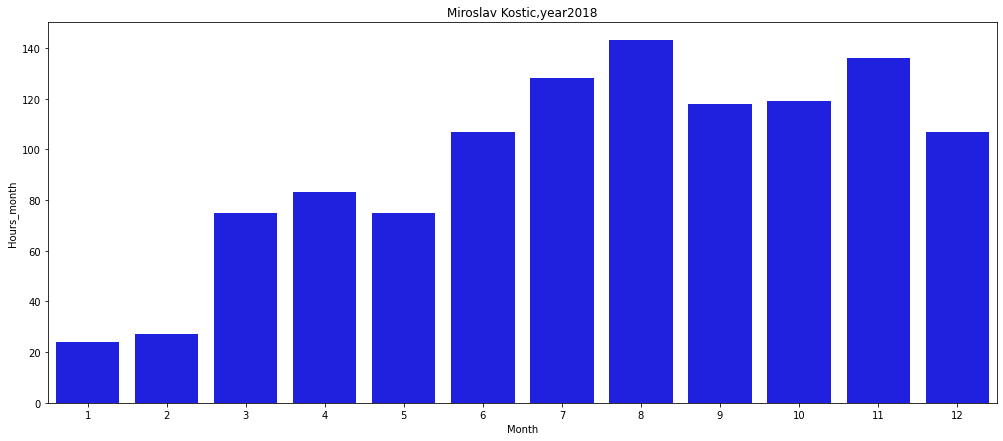

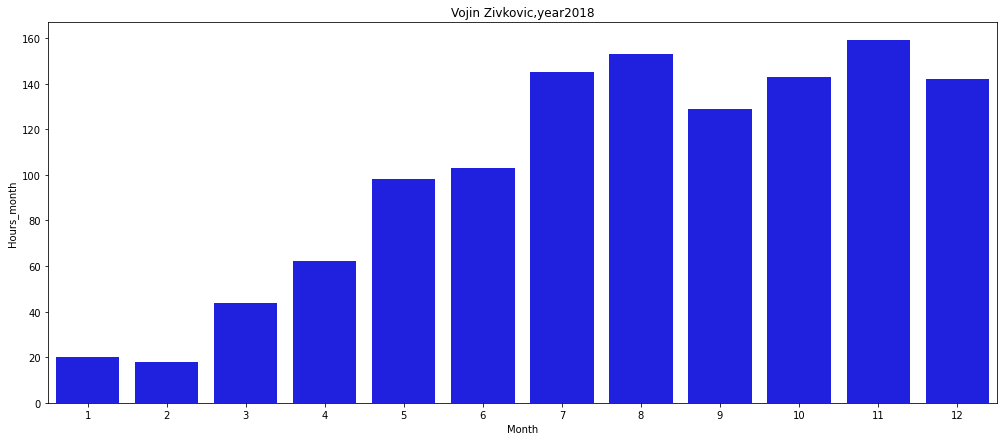

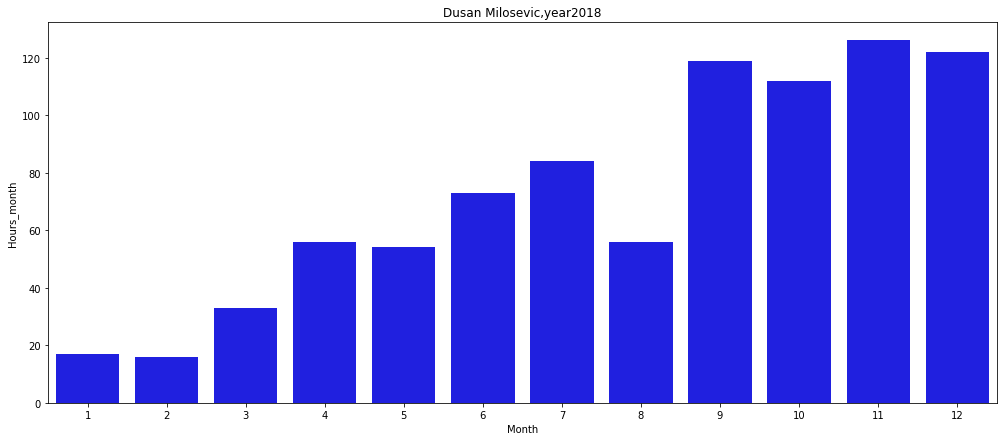

In [80]:
analyze_of_employee_hours_by_month()

 From list choose id numbers of employee You want to analyze
(1, 'Miroslav', 'Kostic')
(2, 'Vojin', 'Zivkovic')
(3, 'Dusan', 'Milosevic')
(4, 'Milos', 'Ilic')
(5, 'Jelena', 'Damnjanovic')
(6, 'Jelena ', 'Lazic')
(7, 'Danilo', 'Petrovic')
(8, 'Bojana ', 'Milosevic')
Please,insert employee id of employee separetd by comma=1,2,3
Please,insert employee year You want to consider2019


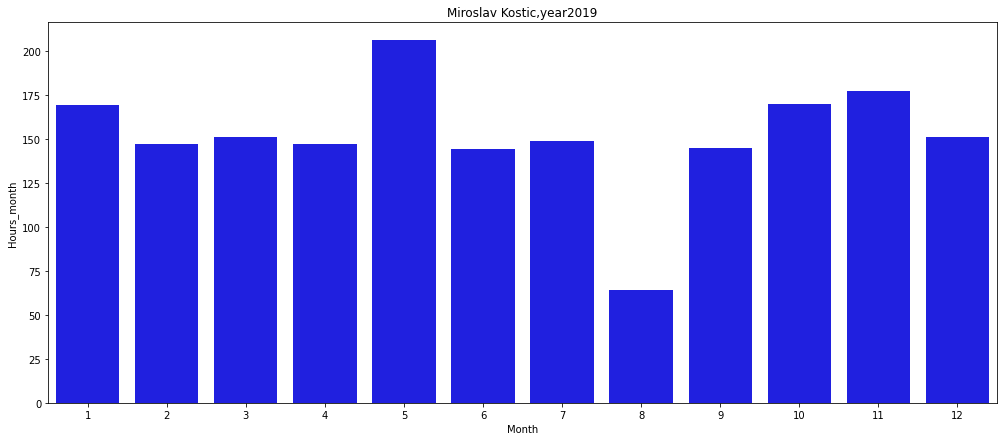

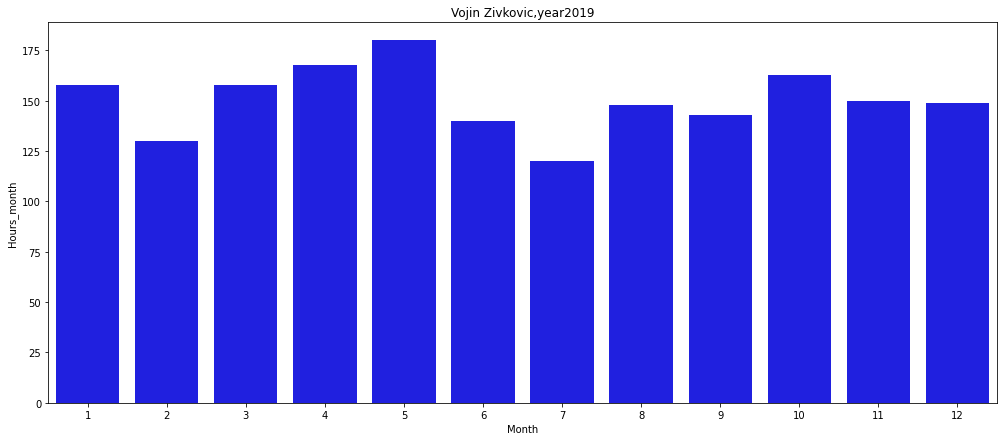

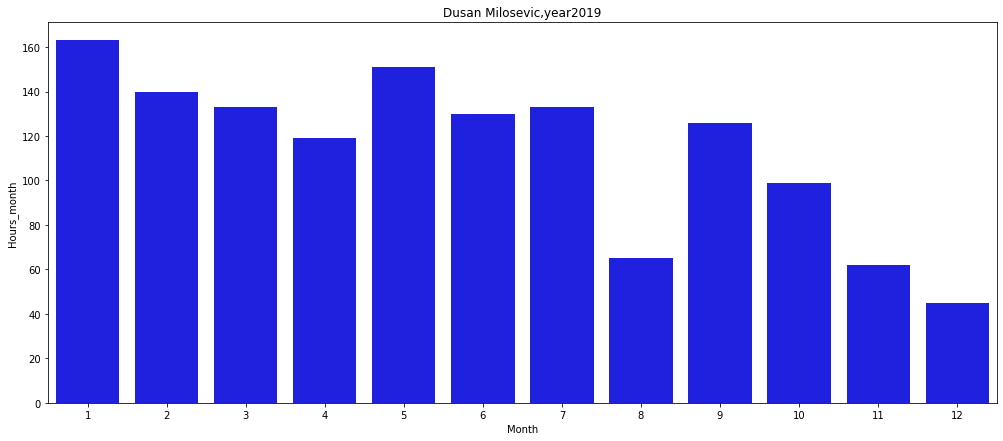

In [81]:
analyze_of_employee_hours_by_month()

In [113]:
def hours_by_employee(employee_id,year):
    mydb = mysql.connector.connect(user='root', password='koreniz2',
                                     host='127.0.0.1',
                                     database='apocrifi_projec')
    
    cursor = mydb.cursor()
    sql_select_query = """select sum(hours) from hours where year(work_date)=%s and employee_id=%s """
    
    q=(year,employee_id)
    cursor.execute(sql_select_query,q)
    record = cursor.fetchone()[0]
    if record is None:
        record=0
    return record

In [114]:
hours_by_employee(1,2018)

Decimal('1142')

In [134]:
def analyze_of_employee_hours_by_year():
    
    mydb = mysql.connector.connect(user='root', password='koreniz2',
                                     host='127.0.0.1',
                                     database='apocrifi_projec')
    
    cursor = mydb.cursor()
    
    sql_select_query = """ select employee_id,first_name,last_name from employee """
    
    cursor.execute(sql_select_query)
    record = cursor.fetchall()
    
    print(" From list choose id numbers of employee You want to analyze")
    
    for x in record:
        print(x)
    id=input("Please,insert employee id of employee separetd by comma=")
    employee=id.split(',')
    year=input('Please,insert employee year You want to consider')
    p=[]
    mylabels=[]
    for i in employee:
        x=hours_by_employee(i,year)
        p.append(int(x))
        cursor = mydb.cursor()
        sql_select_query = """ select first_name from employee where employee_id=%s"""
        q=(i)
        cursor.execute(sql_select_query,(q,))
        record=cursor.fetchone()
        mylabels.append(record)
    plt.figure(figsize=(25,10))
    plt.pie(p,labels=mylabels)
    
    plt.title("Part of employee totoal hours in total hours of year of employee")
        
    


 From list choose id numbers of employee You want to analyze
(1, 'Miroslav', 'Kostic')
(2, 'Vojin', 'Zivkovic')
(3, 'Dusan', 'Milosevic')
(4, 'Milos', 'Ilic')
(5, 'Jelena', 'Damnjanovic')
(6, 'Jelena ', 'Lazic')
(7, 'Danilo', 'Petrovic')
(8, 'Bojana ', 'Milosevic')
Please,insert employee id of employee separetd by comma=1,2,3,4,5,6,7,8
Please,insert employee year You want to consider2019


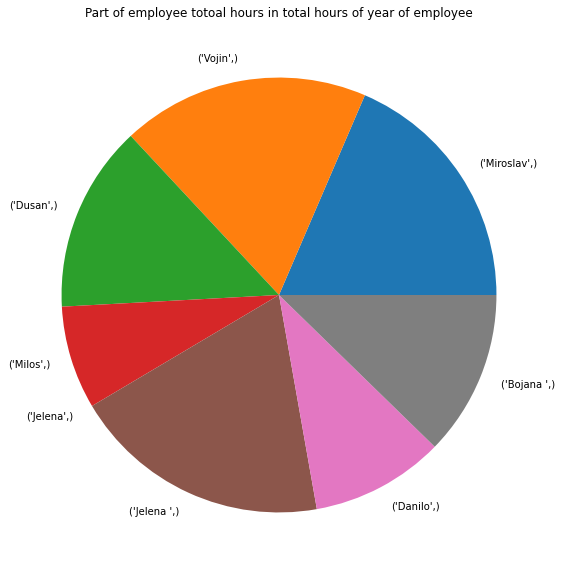

In [135]:
analyze_of_employee_hours_by_year()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


mylabels = mylabels

#mycolors = ["black", "hotpink", "b", "#4CAF50"]

plt.pie(p,labels=mylabels)

myexplode = [0.2, 0, 0, 0]
plt.legend(title = "Employee:")


plt.show() 